In [ ]:
!pip install pandas numpy scikit-learn matplotlib tensorflow

### Fetch dataset

### Add inports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input

from ucimlrepo import fetch_ucirepo 

In [ ]:
occupancy_detection = fetch_ucirepo(id=193) 

X = occupancy_detection.data.features
y = occupancy_detection.data.targets

df = pd.concat([X, y], axis=1)
print("dataset fetched")

### Dataset overview

In [ ]:
print(df.isnull().mean())
df = df.dropna()
df.info()
df.shape
df.head(15)
df.describe()

### Cleanup dataset

In [ ]:
df = df[[
    'LB', 
    'AC', 'FM', 'UC', 'DL', 
    'DS',
    'DP', 
    'ASTV',
    'MSTV',
    'ALTV',
    'MLTV', 
    'Width', 
    # 'Min', 'Max',
    # 'Nmax', 
    # 'Nzeros',
    # 'Mode', 'Mean',
    # 'Median', 'Variance', 
    # 'Tendency', 
    'CLASS', 
    'NSP'
]]

### Повнозв'язна нейронна мережа MLP (Multilayer Perception)

In [74]:
number_of_classes = 11
target = "CLASS"

X = df
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

1700 train samples
426 test samples


In [75]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [76]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)
y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

In [123]:
model = keras.Sequential([
    Input(shape=(14,)), 
    keras.layers.Dense(256, activation="relu"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(number_of_classes, activation="softmax"),
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,523 (439.54 KB)

 Trainable params: 112,011 (437.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [124]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

In [125]:
model_1_fit = model.fit(
    scaled_X_train,
    y_train_one_hot,
    validation_data=(scaled_X_test, y_test_one_hot),
    verbose=2,
    epochs=60, 
    batch_size=64
)

Epoch 1/60
27/27 - 2s - 86ms/step - accuracy: 0.2471 - loss: 2.2538 - val_accuracy: 0.3803 - val_loss: 2.3523
Epoch 2/60
27/27 - 0s - 12ms/step - accuracy: 0.5753 - loss: 1.6941 - val_accuracy: 0.4789 - val_loss: 2.2890
Epoch 3/60
27/27 - 1s - 23ms/step - accuracy: 0.6959 - loss: 1.2479 - val_accuracy: 0.6244 - val_loss: 2.1981
Epoch 4/60
27/27 - 0s - 15ms/step - accuracy: 0.7459 - loss: 0.9537 - val_accuracy: 0.6737 - val_loss: 2.0923
Epoch 5/60
27/27 - 1s - 20ms/step - accuracy: 0.7941 - loss: 0.7271 - val_accuracy: 0.7934 - val_loss: 1.9733
Epoch 6/60
27/27 - 1s - 26ms/step - accuracy: 0.8312 - loss: 0.6043 - val_accuracy: 0.8310 - val_loss: 1.8392
Epoch 7/60
27/27 - 1s - 36ms/step - accuracy: 0.8529 - loss: 0.4926 - val_accuracy: 0.8709 - val_loss: 1.6890
Epoch 8/60
27/27 - 1s - 25ms/step - accuracy: 0.8729 - loss: 0.4106 - val_accuracy: 0.8850 - val_loss: 1.5305
Epoch 9/60
27/27 - 0s - 11ms/step - accuracy: 0.8888 - loss: 0.3671 - val_accuracy: 0.9108 - val_loss: 1.3720
Epoch 10/6

In [126]:
score = model.evaluate(scaled_X_test, y_test_one_hot, verbose=2)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

14/14 - 0s - 5ms/step - accuracy: 0.9930 - loss: 0.0398
Test score: 0.039778757840394974
Test accuracy: 0.9929577708244324


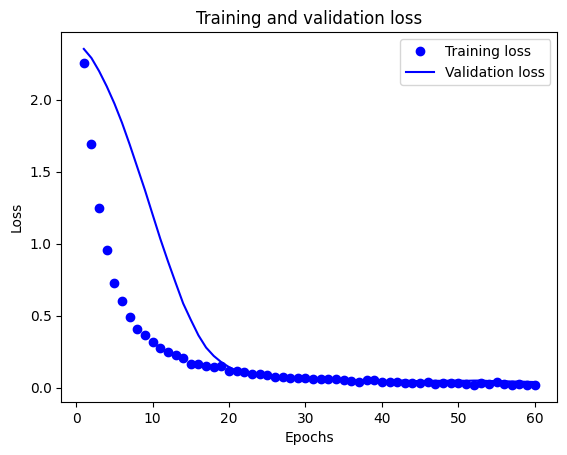

In [127]:
history_dict = model_1_fit.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Task 2

In [7]:
import kagglehub
import os


In [8]:
path = kagglehub.dataset_download("oleksandershevchenko/ship-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/user/.cache/kagglehub/datasets/oleksandershevchenko/ship-classification-dataset/versions/3


In [10]:
def list_files_in_subfolders(base_path):
    subfolders = ['train', 'valid', 'test']
    file_counts = {}
    
    for subfolder in subfolders:
        folder_path = os.path.join(base_path, 'ships_dataset', subfolder)
        if os.path.exists(folder_path):
            file_counts[subfolder] = len(os.listdir(folder_path))
    
    return file_counts

file_counts = list_files_in_subfolders(path)

for subfolder, count in file_counts.items():
    print(f"{subfolder} folder contains {count} files")

train folder contains 10 files
valid folder contains 10 files
test folder contains 10 files


In [14]:
def print_files(subfolder):
    folder_path = os.path.join(path, 'ships_dataset', subfolder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            print(file)

def print_head_files(subfolder):
    folder_path = os.path.join(path, 'ships_dataset', subfolder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files[:10]:
            print(file)

chosen_folder = 'train'
print(f"First 10 files in the {chosen_folder} folder:")
print_files(chosen_folder)
print_head_files("train/Tug")

First 10 files in the train folder:
Container Ship
Tug
Submarine
Aircraft Carrier
Car Carrier
Recreational
Bulkers
Sailboat
Cruise
DDG
Tug_768.jpeg
Tug_618.jpeg
Tug_797.jpeg
Tug_374.jpeg
Tug_280.jpeg
Tug_575.jpeg
Tug_619.jpeg
Tug_753.jpeg
Tug_368.jpeg
Tug_49.jpeg


### Task 3